In [2]:
!pip install numpy pandas matplotlib pyarrow

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the Tags/Labels CSV file:

In [10]:
tags_df = pd.read_csv(os.path.join('..', '..', 'data', 'mulabel', 'raw', 'map_seed_tags.csv'))

Define the bucket ranges:

In [11]:
bucket_ranges = [5000, 4000, 3500, 3000, 2500, 2000, 1500, 1000, 900, 800, 700, 600, 500, 400, 300, 200, 100, 50, 30, 20, 10, 0]
# Create a dictionary to store the data for each bucket
bucket_data = {bucket: [] for bucket in bucket_ranges}

Iterate over the rows and assign each label to the appropriate bucket:

In [12]:
for _, row in tags_df.iterrows():
    label_id = row['id']
    count = row['count']
    for idx, bucket in enumerate(bucket_ranges):
        lower_bound = bucket
        upper_bound = bucket_ranges[idx - 1] if idx > 0 else 1000000
        if lower_bound <= count < upper_bound:
            bucket_data[bucket].append(count)
            break

Calculate the average and standard deviation for each bucket

In [13]:
bucket_averages = []
bucket_stds = []
for bucket in bucket_ranges:
    counts = bucket_data[bucket]
    if counts:
        bucket_averages.append(np.mean(counts))
        bucket_stds.append(np.std(counts))
    else:
        bucket_averages.append(0)
        bucket_stds.append(0)

In [75]:
#print(bucket_data)

Do the same as above but use pandas:

In [14]:
ocurr_bins = bucket_ranges
ocurr_bins.reverse()

ocurr_bins.append(float('inf'))
print(pd.cut(tags_df['count'], bins=ocurr_bins).value_counts().sort_index())

count
(0.0, 10.0]         323
(10.0, 20.0]        175
(20.0, 30.0]        108
(30.0, 50.0]        141
(50.0, 100.0]       237
(100.0, 200.0]      190
(200.0, 300.0]      113
(300.0, 400.0]       93
(400.0, 500.0]       63
(500.0, 600.0]       51
(600.0, 700.0]       46
(700.0, 800.0]       32
(800.0, 900.0]       27
(900.0, 1000.0]      29
(1000.0, 1500.0]     89
(1500.0, 2000.0]     61
(2000.0, 2500.0]     27
(2500.0, 3000.0]     32
(3000.0, 3500.0]     15
(3500.0, 4000.0]     12
(4000.0, 5000.0]     18
(5000.0, inf]        78
Name: count, dtype: int64


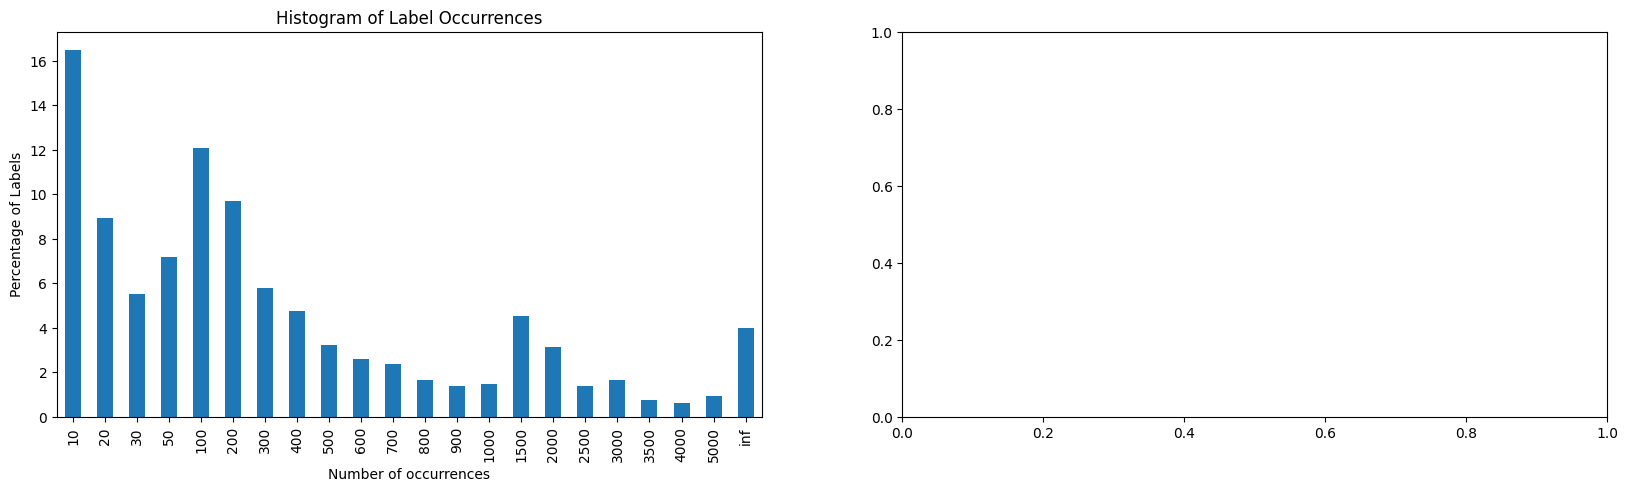

In [15]:
ocurr_histogram_counts = pd.cut(tags_df['count'], bins=ocurr_bins).value_counts().sort_index()
ocurr_histogram_percentages = (ocurr_histogram_counts / ocurr_histogram_counts.sum()) * 100

fig, axs = plt.subplots(1, 2, figsize=(20, 5))  # 1 row, 1 columns
ocurr_histogram_percentages.plot(
    ax=axs[0], kind='bar', 
    title='Histogram of Label Occurrences', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[0].set_xticklabels(ocurr_bins[1:])
plt.show()

Uniform scales

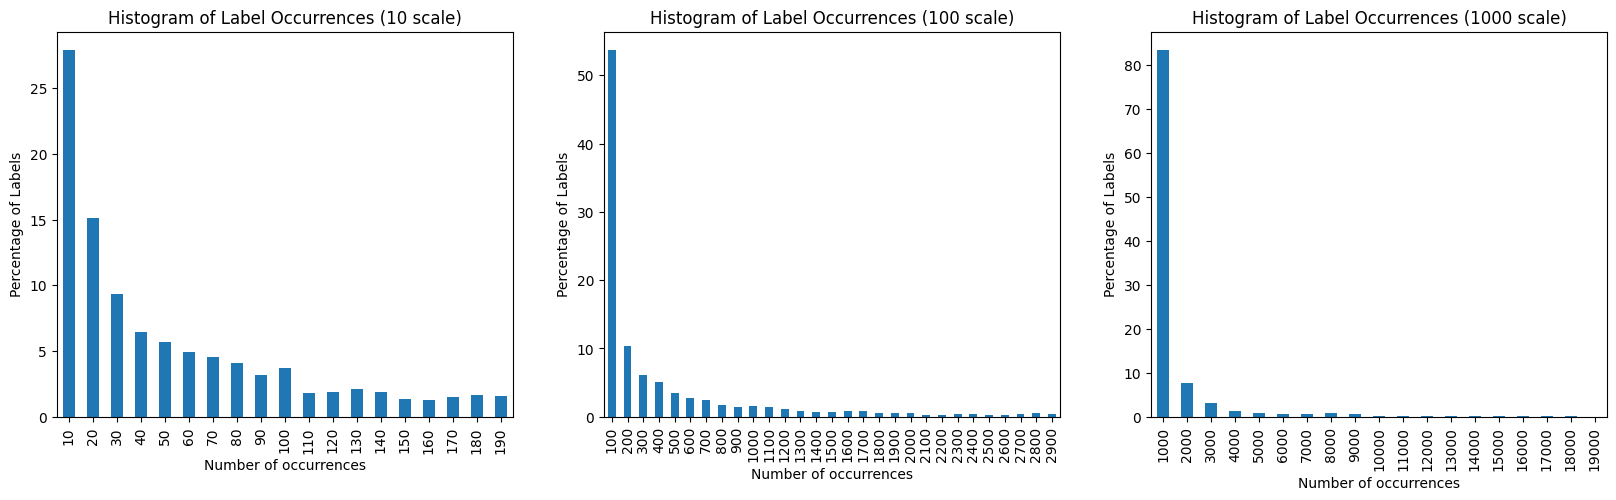

In [34]:
ocurr10_bins = [i for i in range(0, 200, 10)]
ocurr10_histogram_counts = pd.cut(tags_df['count'], bins=ocurr10_bins).value_counts().sort_index()
ocurr10_histogram_percentages = (ocurr10_histogram_counts / ocurr10_histogram_counts.sum()) * 100

ocurr100_bins = [i for i in range(0, 3000, 100)]
ocurr100_histogram_counts = pd.cut(tags_df['count'], bins=ocurr100_bins).value_counts().sort_index()
ocurr100_histogram_percentages = (ocurr100_histogram_counts / ocurr100_histogram_counts.sum()) * 100

ocurr1000_bins = [i for i in range(0, 20000, 1000)]
ocurr1000_histogram_counts = pd.cut(tags_df['count'], bins=ocurr1000_bins).value_counts().sort_index()
ocurr1000_histogram_percentages = (ocurr1000_histogram_counts / ocurr1000_histogram_counts.sum()) * 100

fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 2 columns
ocurr10_histogram_percentages.plot(
    ax=axs[0], kind='bar',
    title='Histogram of Label Occurrences (10 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[0].set_xticklabels(ocurr10_bins[1:])

ocurr100_histogram_percentages.plot(
    ax=axs[1], kind='bar', 
    title='Histogram of Label Occurrences (100 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[1].set_xticklabels(ocurr100_bins[1:])

ocurr1000_histogram_percentages.plot(
    ax=axs[2], kind='bar', 
    title='Histogram of Label Occurrences (1000 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[2].set_xticklabels(ocurr1000_bins[1:])
plt.show()

Recount tags from the article index files, just to be sure:

In [16]:
import os
import ast
import glob 

In [17]:
dtype_spec = {
    'sent': int,
    'words': int,
    'sp_tokens': int,
    'tags_count': int
}

file_paths = glob.glob(os.path.join('..', '..', 'data', 'mulabel', 'raw', 'map_articles*.csv'))
dfs = []

for file in file_paths:
    print(f'Reading file {file}')
    tmp_df = pd.read_csv(file, dtype=dtype_spec)
    tmp_df['tags'] = tmp_df['tags'].apply(ast.literal_eval)
    dfs.append(tmp_df)

article_df = pd.concat(dfs, ignore_index=True)


print(f'Number of samples: {article_df.shape[0]}')
print(f'And columns: {article_df.columns}')

Reading file ../../data/mulabel/raw/map_articles_2023_01.csv
Reading file ../../data/mulabel/raw/map_articles_2023_02.csv
Reading file ../../data/mulabel/raw/map_articles_2023_03.csv
Reading file ../../data/mulabel/raw/map_articles_2023_04.csv
Reading file ../../data/mulabel/raw/map_articles_2023_05.csv
Reading file ../../data/mulabel/raw/map_articles_2023_06.csv
Reading file ../../data/mulabel/raw/map_articles_2023_07.csv
Reading file ../../data/mulabel/raw/map_articles_2023_08.csv
Reading file ../../data/mulabel/raw/map_articles_2023_09.csv
Reading file ../../data/mulabel/raw/map_articles_2023_10.csv
Reading file ../../data/mulabel/raw/map_articles_2023_11.csv
Reading file ../../data/mulabel/raw/map_articles_2023_12.csv
Number of samples: 1068261
And columns: Index(['id', 'uuid', 'public', 'created', 'published', 'country',
       'mon_country', 'lang', 'script', 'm_id', 'rel_path', 'url', 'sent',
       'words', 'sp_tokens', 'tags_count', 'tags'],
      dtype='object')


In [24]:
from collections import Counter
kept_tags = set(tags_df['id'].to_list())

# Create a list of all tags in kept_tags and in article dataframe
all_tags = []
for tags in article_df['tags']:
    for tag in tags:
        if tag in kept_tags:
            all_tags.append(tag)

# Count the occurrences of each tag
tag_counts = Counter(all_tags)

# Construct the tag counts dataframe
tag_dict = {'tag':[], 'count':[]}
for label, count in tag_counts.items():
    tag_dict['tag'].append(label)
    tag_dict['count'].append(count)

tag_df = pd.DataFrame(tag_dict)
tag_df.head()

num_tags = tag_df.shape[0]
print(num_tags)

1960


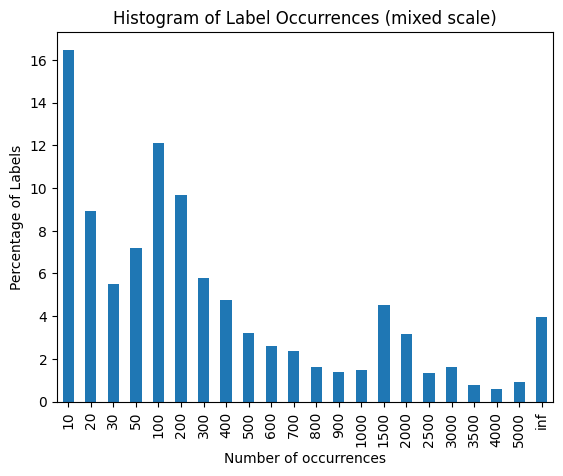

In [27]:
ocurr_histogram_counts = pd.cut(tag_df['count'], bins=ocurr_bins).value_counts().sort_index()
ocurr_histogram_percentages = (ocurr_histogram_counts / ocurr_histogram_counts.sum()) * 100
ocurr_histogram_percentages.plot(kind='bar')
plt.xlabel('Number of occurrences')
plt.ylabel('Percentage of Labels')
plt.title('Histogram of Label Occurrences (mixed scale)')
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks, ocurr_bins[1:])
plt.show()

Uniform scales:

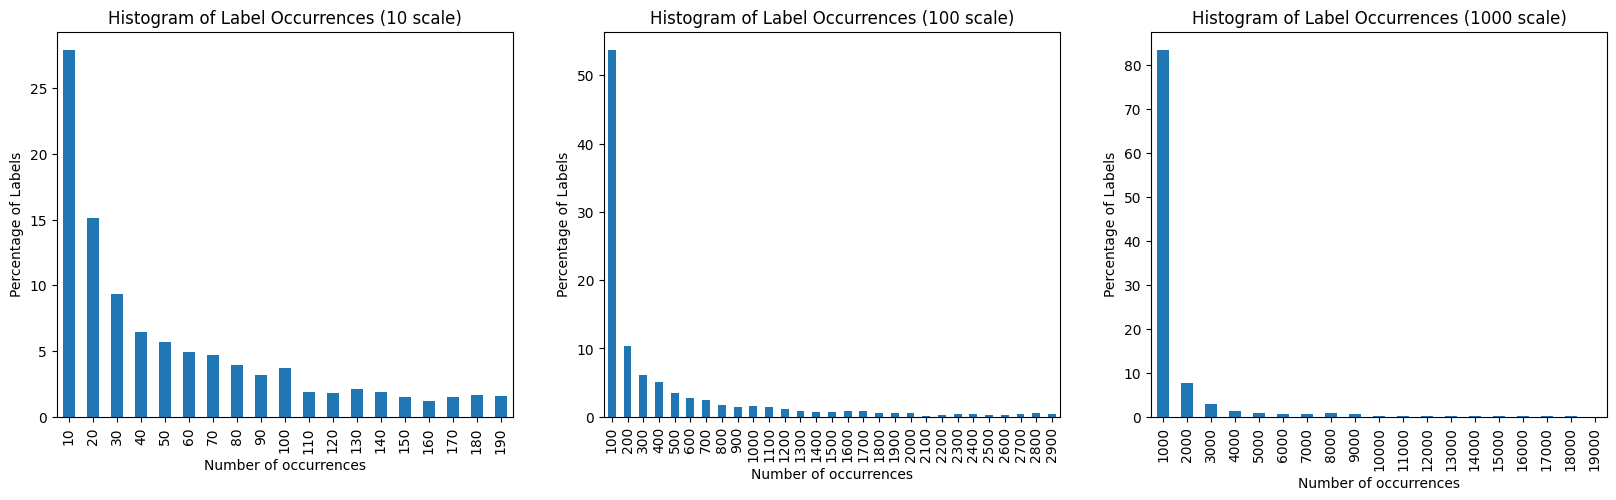

In [37]:
ocurr10_bins = [i for i in range(0, 200, 10)]
ocurr10_histogram_counts = pd.cut(tag_df['count'], bins=ocurr10_bins).value_counts().sort_index()
ocurr10_histogram_percentages = (ocurr10_histogram_counts / ocurr10_histogram_counts.sum()) * 100

ocurr100_bins = [i for i in range(0, 3000, 100)]
ocurr100_histogram_counts = pd.cut(tag_df['count'], bins=ocurr100_bins).value_counts().sort_index()
ocurr100_histogram_percentages = (ocurr100_histogram_counts / ocurr100_histogram_counts.sum()) * 100

ocurr1000_bins = [i for i in range(0, 20000, 1000)]
ocurr1000_histogram_counts = pd.cut(tag_df['count'], bins=ocurr1000_bins).value_counts().sort_index()
ocurr1000_histogram_percentages = (ocurr1000_histogram_counts / ocurr1000_histogram_counts.sum()) * 100

fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 2 columns
ocurr10_histogram_percentages.plot(
    ax=axs[0], kind='bar',
    title='Histogram of Label Occurrences (10 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[0].set_xticklabels(ocurr10_bins[1:])

ocurr100_histogram_percentages.plot(
    ax=axs[1], kind='bar', 
    title='Histogram of Label Occurrences (100 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[1].set_xticklabels(ocurr100_bins[1:])

ocurr1000_histogram_percentages.plot(
    ax=axs[2], kind='bar', 
    title='Histogram of Label Occurrences (1000 scale)', 
    xlabel='Number of occurrences',
    ylabel='Percentage of Labels'
)
axs[2].set_xticklabels(ocurr1000_bins[1:])
plt.show()

Compute label density, cardinality and diversity:

In [40]:
num_tags = tag_df.shape[0]
num_samples = article_df.shape[0]
tags_diversity = {} 
sum_tags_per_sample = 0
sum_tags_over_all = 0
sample_tag_counts = []
for tags in article_df['tags']:
    for tag in tags:
        if tag not in kept_tags:
            tags.remove(tag)
    sum_tags_per_sample += len(tags)
    sample_tag_counts.append(len(tags))
    sum_tags_over_all += (len(tags) / num_tags)
    tags_s = str(sorted(set(tags)))
    if not tags_s in tags_diversity:
        tags_diversity[tags_s] = 1
    else:
        tags_diversity[tags_s] += 1
    
label_density = sum_tags_over_all / num_samples
label_cardinality = sum_tags_per_sample / num_samples
label_diversity = len(tags_diversity)
    

print(f'Label density: {label_density}')
print(f'Label cardinality: {label_cardinality}')
print(f'Label diversity: {label_diversity}')

std_dev_cols = np.std(sample_tag_counts, axis=0)
mean_cols = np.mean(sample_tag_counts, axis=0)
print(f"Mean {mean_cols} Standard deviation {std_dev_cols} along columns:")


Label density: 0.0011381371696712566
Label cardinality: 2.2307488525744175
Label diversity: 183361
Mean 2.2307488525744175 Standard deviation 2.315677077961333 along columns:
